ZADANIE 1

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor


import pandas as pd
import numpy as np
import matplotlib.pyplot as pltz
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils.validation import column_or_1d

data = pd.read_csv('Advertising.csv', sep = ',', header = None)

data = data.drop(0, axis = 1)

data = data.dropna()
X = data.iloc[1:,:].values
y = data.iloc[1:,3].values
y = y.reshape(-1,1)
y = column_or_1d(y, warn=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in [(100, 100, 100, 100, 100),(200,150,70)]:
    network1 = MLPRegressor(solver='adam',hidden_layer_sizes=i, max_iter = 5000, tol = 0.001, activation = 'tanh')
    network1.fit(X_train, y_train)
    y1_predicted = network1.predict(X_test)
    print(f"Layers: {i} MSE score : {mean_squared_error(y_test, y1_predicted)}")

for fun in ['relu', 'tanh']:
    network1 = MLPRegressor(solver='adam',hidden_layer_sizes=(200,150,70), max_iter = 5000, tol = 0.001, activation = fun)
    network1.fit(X_train, y_train)
    y1_predicted = network1.predict(X_test)
    print(f"Activation function: {fun} MSE score : {mean_squared_error(y_test, y1_predicted)}")

/tmp/ipykernel_678/2576090376.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Layers: (100, 100, 100, 100, 100) MSE score : 3.1259497868391932
Layers: (200, 150, 70) MSE score : 1.3734185375373171
Activation function: relu MSE score : 0.4068246287323327
Activation function: tanh MSE score : 1.3124417577874883


Funkcja aktywacji tanh osiągnęła lepszy wynik niż relu (niższy MSE). W przypadku aproksymacji funkcji, funkcja aktywacji tanh jest więc bardziej odpowiednia, ponieważ pozwala na uzyskanie lepszych wyników. Możemy również zauważyć, że większa ilość warstw ukrytych nie zawsze prowadzi do lepszych wyników. W przypadku tego zadania, trójwarstwowa sieć osiągnęła lepsze wyniki niż pięciowarstwowa.

ZADANIE 2

y = 0.20 * tanh(0.60 +0.20 * x) -1.07 0.11 * tanh(-0.99 +0.11 * x) -1.07 -0.40 * tanh(-1.31 -0.40 * x) -1.07 -0.42 * tanh(1.19 -0.42 * x) -1.07 


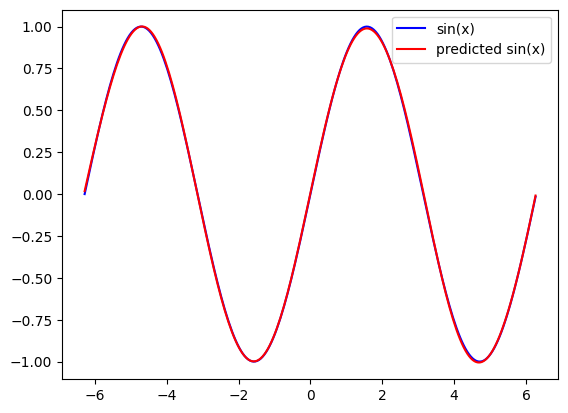

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-2*np.pi,2*np.pi,0.05)
y = np.sin(x)

X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1),y)

network = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(4,3), max_iter = 1000, tol = 0.001, activation = 'tanh')

network.fit(X_train, y_train)

y_pred = network.predict(x.reshape(-1,1))

plt.plot(x,y,'b')
plt.plot(x,y_pred,'r')
plt.legend(['sin(x)', 'predicted sin(x)'])

f = 'y = '

# set precision to 2 decimal places
for i in range(network.coefs_[0].shape[1]):
    f += f'{network.coefs_[0][0][i]:.2f} * tanh({network.intercepts_[0][i]:.2f} {network.coefs_[0][0][i]:+.2f} * x) '
    f += f'{network.intercepts_[1][0]:+.2f} '
print(f)

W zadaniu drugim należało dokonać aproksymacji funkcji sinu na przedziale [−2π,2π]. Solver lbfgs osiągnął lepsze wyniki niż solver adam. Aby uzyskać zadawalające wyniki, wystarczyło zastosować jedną warstwę ukrytą (hidden_layer_sizes=(4,3)). 

ZADANIE 3

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
california = fetch_california_housing()
X = california.data
y = california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

network1 = MLPRegressor(solver='adam',hidden_layer_sizes=(30, 15, 10), max_iter = 80, tol = 0.001, activation = 'tanh')
network1.fit(X_train, y_train)
y1_predicted = network1.predict(X_test)

network2 = MLPRegressor(solver='adam',hidden_layer_sizes=(30, 30), max_iter = 80, tol = 0.001, activation = 'tanh')
network2.fit(X_train, y_train)
y2_predicted = network2.predict(X_test)

network3 = MLPRegressor(solver='adam',hidden_layer_sizes=(60), max_iter = 80, tol = 0.001, activation = 'tanh')
network3.fit(X_train, y_train)
y3_predicted = network3.predict(X_test)

print("Network 1 MSE score : %f" % (mean_squared_error(y_test, y1_predicted)))
print("Network 2 MSE score : %f" % (mean_squared_error(y_test, y2_predicted)))
print("Network 3 MSE score : %f" % (mean_squared_error(y_test, y3_predicted)))


Network 1 MSE score : 0.311398
Network 2 MSE score : 0.305302
Network 3 MSE score : 0.367852


Do znormalizowania danych użyto obiektu StandardScaler, który standaryzuje cechy poprzez usunięcie średniej i skalowanie do jednostkowej wariancji. Przetestowane zostały 3 różne konfiguracje warstw ukrytych. Najlepsze wyniki osiągnięto dla konfiguracji  (30, 30) - jedna warstwa ukryta z 30 neuronami. Jednak różnice w wynikach były niewielkie, co może wskazywać na to, że w tym przypadku konfiguracja warstw ukrytych nie ma dużego wpływu na wyniki.

ZADANIE 4

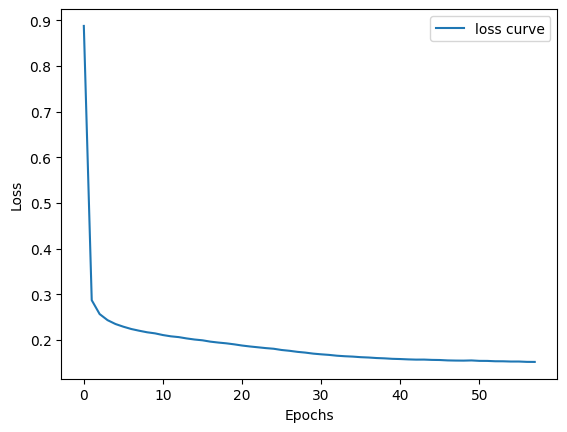

In [68]:
network2 = MLPRegressor(solver='adam',hidden_layer_sizes=(30, 30), max_iter = 180, tol = 0.0008, activation = 'tanh')
network2.fit(X_train, y_train)
y2_predicted = network2.predict(X_test)

plt.plot(network2.loss_curve_)
plt.legend(['loss curve'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Wykres przedstawia zależność błędu średniokwadratowego od liczby epok. Możemy zauważyć, że wraz ze wzrostem liczby epok błąd maleje. Prędkość spadku błędu jest widocznie szybka dla pierwszych 20-30 epok a następnie spada. Często jednak zdarza się, że wraz z dalszym wzrostem liczby epok błąd zaczyna rosnąć. Jest to zjawisko przeuczenia modelu lub osiągnięciem punktu, w którym dalsze uczenie nie przynosi polepszenia dokładności modelu. Ważne jest śledzenie przebiegu procesu uczenia się, aby uniknąć nadmiernego dopasowania lub zbyt wczesnego zakończenia uczenia, co może ograniczyć zdolność modelu do osiągnięcia optymalnych wyników.

ZADANIE 5

In [64]:
for i in [0.2, 0.35, 0.5, 0.65, 0.8]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    network = MLPRegressor(solver='adam',hidden_layer_sizes=(30, 30), max_iter = 120, tol = 0.001, activation = 'tanh')
    network.fit(X_train, y_train)
    y_predicted = network.predict(X_test)
    print(f"Test size: {i} MSE score : {mean_squared_error(y_test, y_predicted)}")

Test size: 0.2 MSE score : 0.30269198863828767
Test size: 0.35 MSE score : 0.3035319009290979
Test size: 0.5 MSE score : 0.3167377868382074
Test size: 0.65 MSE score : 0.3366751925442262
Test size: 0.8 MSE score : 0.3514384962854354


Poprzez zmniejszanie udziału danych testowych (zwiększając udział danych uczących), zauważamy spadek wartości MSE. To sugeruje, że model lepiej dopasowuje się do danych treningowych, jednakże może mieć ograniczoną zdolność do generalizacji na nowe dane. Optymalne wyniki MSE osiągnięto dla proporcji podziału danych 80-20 i 65-35, co wskazuje, że modele w tych proporcjach najlepiej przewidują wartość mediany cen mieszkań.